In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import copy
from GravNN.Networks.Networks import ResNet, TraditionalNet

In [19]:
file_name = '/Users/johnmartin/Documents/GraduateSchool/Research/ML_Gravity/Data/Dataframes/useless_04_15.data'
df = pd.read_pickle(file_name)[:-1]
backup = copy.deepcopy(df)

In [16]:
loss_list = []
val_loss_list = []

for history in df['history']:
    loss_list.append(history['loss'][-1])
    val_loss_list.append(history['val_loss'][-1])
df['loss'] = loss_list
df['val_loss'] = val_loss_list

networks = (df['network_type'] == ResNet)
networks.replace(True, 'resnet',inplace=True)
networks.replace(False, 'traditional',inplace=True)
df['network_type'] = networks

df['model_param_est'] = df['Brillouin_param_rse_median']*(df['Brillouin_param_rse_median']+1)

In [ ]:
sub_df = df[['params', 'batch_size', 'N_train', 'activation', 'initializer', 'learning_rate', 'network_type', 'loss', 'val_loss']].sort_values(by='val_loss', ascending=False)#, 'Brillouin_sh_diff_median']

min_y = None
max_y = None#0.00650509
df.plot.scatter('params', 'val_loss', ylim=[min_y, max_y],logy=True, grid=True)
df.plot.scatter('loss', 'val_loss',  ylim=[min_y,max_y],logy=True, logx=True, grid=True)
df.plot.scatter('Brillouin_rse_median', 'val_loss', ylim=[min_y, max_y],logy=True, grid=True)

df.plot.scatter('model_param_est', 'Brillouin_rse_mean', ylim=[min_y, max_y],logy=True, grid=True)
df.plot.scatter('batch_size', 'Brillouin_rse_mean',  ylim=[min_y,max_y], logx=True, logy=True, grid=True)
df.plot.scatter('activation', 'Brillouin_rse_mean',  ylim=[min_y, max_y], logy=True, grid=True)
df.plot.scatter('initializer', 'Brillouin_rse_mean', ylim=[min_y, max_y], logy=True, grid=True)
df.plot.scatter('N_train', 'Brillouin_rse_mean', ylim=[min_y, max_y], logx=True, logy=True, grid=True)
df.plot.scatter('epochs', 'Brillouin_rse_mean', ylim=[min_y, max_y], logx=False, logy=True, grid=True)

df.plot.scatter('N_train', 'Brillouin_param_rse_mean', ylim=[min_y, max_y], logx=True, logy=False, grid=True)
df.plot.scatter('network_shape', 'Brillouin_rse_median', ylim=[min_y, max_y],  logy=True, grid=True)

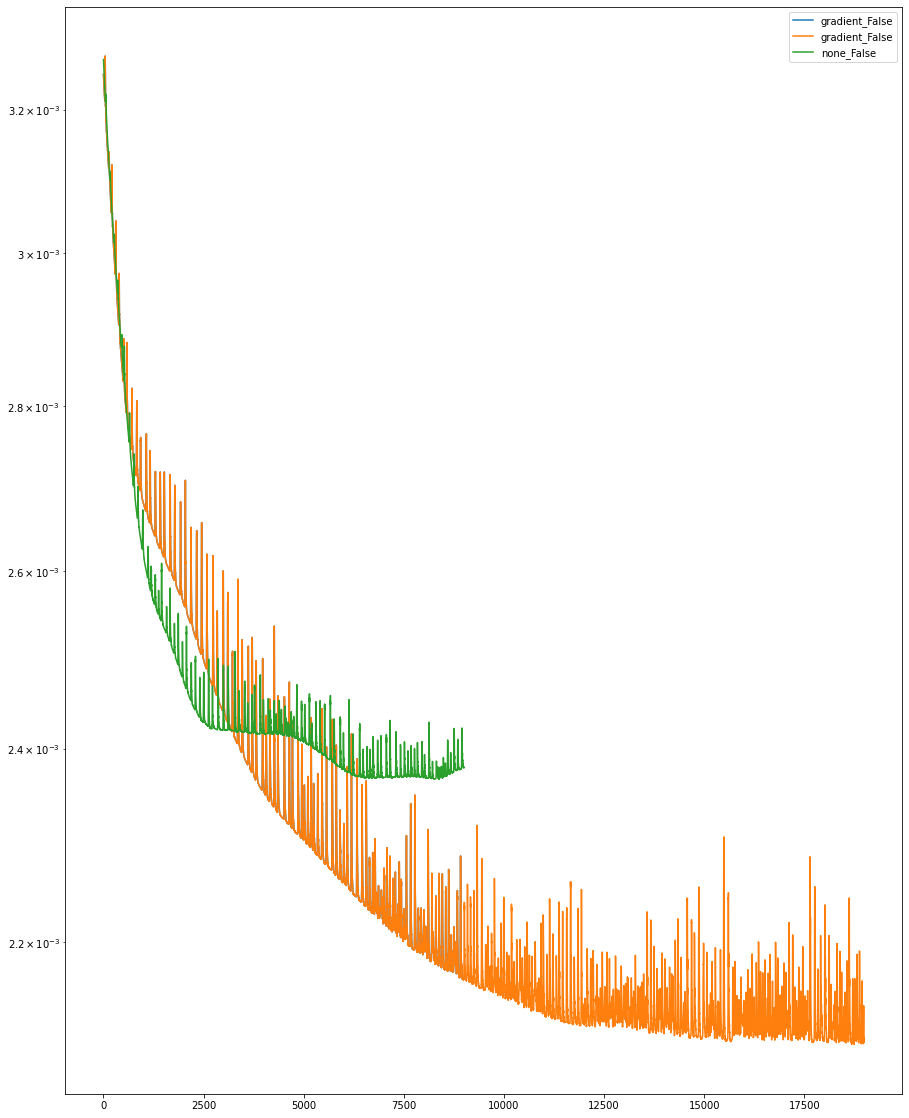

In [17]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

plt.figure(figsize=(15,20))
for i in range(0,len(df)):
    row = df.iloc[i]
    y = row['history']['val_loss']
    x = np.linspace(0,50000,len(y))

    N = 1000
    y_hat = y[N:]
    x_hat = x[N:]
    poly_y = uniform_filter1d(y_hat, 10)
   
    alpha = 1

    plt.semilogy(poly_y,alpha=alpha, label=row['PINN_flag'] + "_" + str(row['use_potential']))

plt.legend()


In [ ]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

plt.figure(figsize=(15,20))
for i in range(0,len(df)):
    row = df.iloc[i]
    y = row['history']['val_loss']
    x = np.linspace(0,50000,len(y))
    
    N = 1000
    y_hat = y[N:]
    x_hat = x[N:]
#     poly = np.polyfit(x_hat, y_hat,10)
#     poly_y = np.poly1d(poly)(x_hat)
    poly_y = uniform_filter1d(y_hat, 500)
    alpha = 1.0 if row['learning_rate'] == 0.00005 else 0.1 # 0.00005, 0.0005, 0.005
    #alpha = 1.0 if row['batch_size'] == 2048 else 0.1
    alpha = 1
    grad = np.gradient(poly_y, x_hat)
    grad_poly_y = uniform_filter1d(grad, 5000)

    plt.plot(grad_poly_y,alpha=alpha)
    


In [ ]:
df = copy.deepcopy(backup)

In [20]:
# file_name = '/Users/johnmartin/Documents/GraduateSchool/Research/ML_Gravity/Data/Dataframes/useless_04_15.data'
# df = df.to_pickle(file_name)

In [ ]:
backup[['params','Brillouin_param_rse_mean', 'Brillouin_param_sigma_2_mean', 'batch_size', 'decay_rate_epoch','learning_rate', 'decay_rate', 'activation']].sort_values(by='Brillouin_param_rse_mean')